In [1]:
import pandas as pd

from itertools import combinations
from scipy import stats
from sklearn import preprocessing

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [37]:
df = pd.DataFrame(read_json_gz_lines('../data/clf-ab-acc.json/'))

In [38]:
d1s, d2s = zip(*df[['d1', 'd2']].apply(lambda x: sorted(x), 1))
df.drop(columns=['d1', 'd2'])
df['d1'] = d1s
df['d2'] = d2s

In [39]:
df['pair'] = df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [40]:
order = df.groupby('pair').mean().acc.sort_values(ascending=False).index

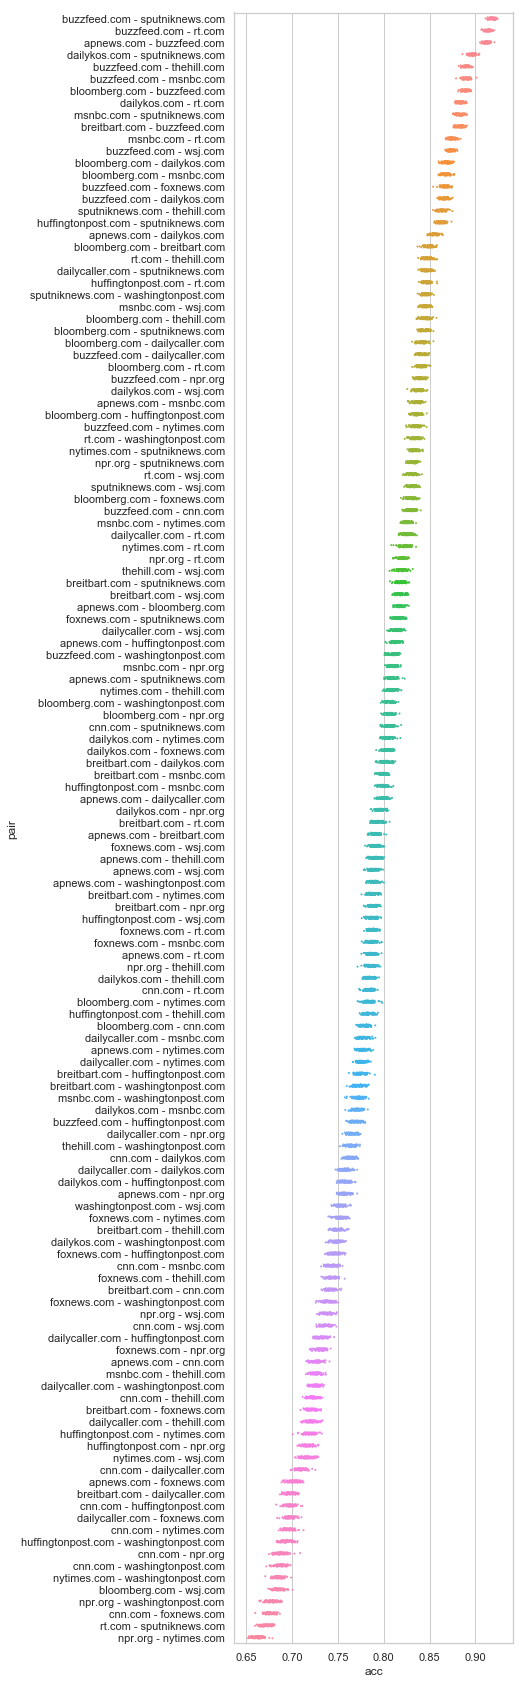

In [41]:
plt.figure(figsize=(5,30))
sns.stripplot(x='acc', y='pair', data=df, order=order, s=2)

In [56]:
mean_df = df.groupby(['d1', 'd2', 'pair']).mean().reset_index()
mean_df['acc_scaled'] = preprocessing.scale(mean_df.acc)

In [57]:
mean_df.sort_values('acc_scaled', ascending=False, inplace=True)

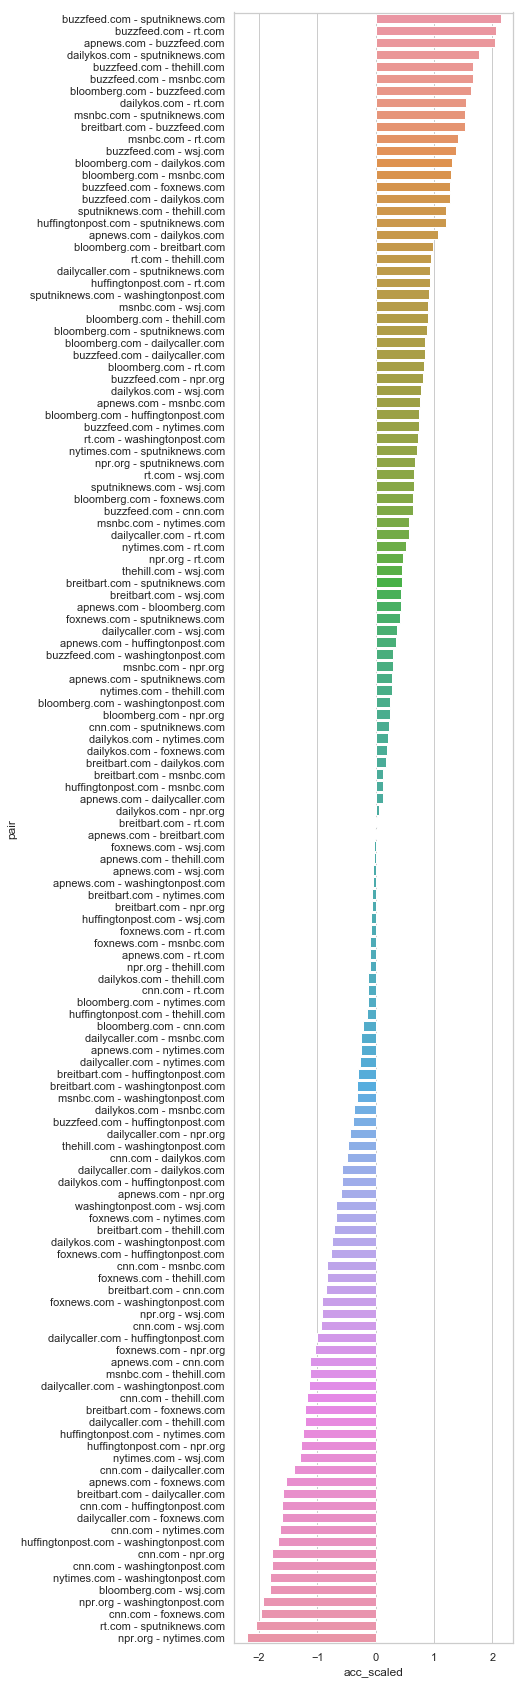

In [58]:
plt.figure(figsize=(5,30))
sns.barplot(x='acc_scaled', y='pair', data=mean_df)

In [60]:
mean_df.to_json('data/headline-graph.json', orient='records', lines=True)

In [61]:
mean_df

,d1,d2,pair,acc,acc_scaled
54,buzzfeed.com,sputniknews.com,buzzfeed.com - sputniknews.com,0.918274,2.139535
53,buzzfeed.com,rt.com,buzzfeed.com - rt.com,0.913906,2.065381
2,apnews.com,buzzfeed.com,apnews.com - buzzfeed.com,0.912524,2.041933
87,dailykos.com,sputniknews.com,dailykos.com - sputniknews.com,0.896893,1.776583
55,buzzfeed.com,thehill.com,buzzfeed.com - thehill.com,0.890221,1.663331
50,buzzfeed.com,msnbc.com,buzzfeed.com - msnbc.com,0.890204,1.663042
17,bloomberg.com,buzzfeed.com,bloomberg.com - buzzfeed.com,0.888759,1.638510
86,dailykos.com,rt.com,dailykos.com - rt.com,0.883500,1.549230
111,msnbc.com,sputniknews.com,msnbc.com - sputniknews.com,0.882814,1.537587
31,breitbart.com,buzzfeed.com,breitbart.com - buzzfeed.com,0.882762,1.536703
